In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

# Load Dataset

In [2]:
data = pd.read_csv('wine_preprocessed_1.csv')

In [3]:
# Categorize the quality column
data ['quality_category'] = data['quality'] .apply(lambda x: '0' if x <= 3 else ('1' if x <= 6 else '2'))

# Check the value counts of the new quality_category column
data['quality_category'].value_counts()

quality_category
1    5162
2    1271
0      30
Name: count, dtype: int64

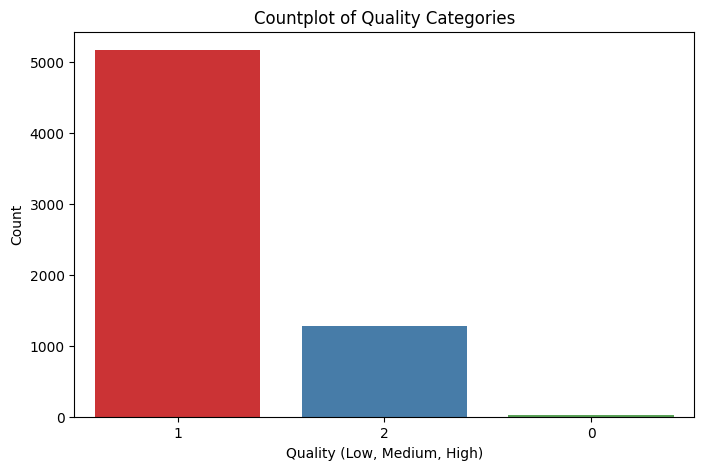

In [4]:
# Make a countplot of the quality_category column
plt.figure(figsize=(8, 5))
sns.countplot(x="quality_category", hue="quality_category", data=data, palette='Set1', legend=False)
plt.title("Countplot of Quality Categories")
plt.xlabel("Quality (Low, Medium, High)")
plt.ylabel("Count")
plt.show()
import plotly.express as px

# Create a pie chart of the quality_category column
fig = px.pie(data, names='quality_category', title='Distribution of Quality Categories')
fig.show()

In [5]:
# X and y creation
X = features = data.drop(['quality', 'quality_category'], axis=1)
y = data['quality_category']
from sklearn.model_selection import train_test_split
# data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(5170, 12) (5170,)
(1293, 12) (1293,)


In [6]:
# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Gradient Boosting Classification

Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.87      0.93      0.90      1041
           2       0.61      0.45      0.52       246

    accuracy                           0.84      1293
   macro avg       0.49      0.46      0.47      1293
weighted avg       0.82      0.84      0.82      1293

Gradient Boosting Accuracy: 0.8352668213457076
Gradient Boosting Precision: 0.8185613921855555
Gradient Boosting Recall: 0.8352668213457076
Gradient Boosting F1 Score: 0.8237079115962171


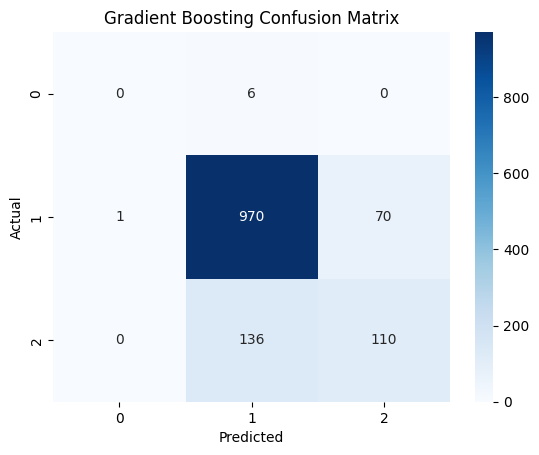

     Actual Predicted
5238      1         1
62        1         1
4205      1         1
5861      1         1
6295      1         1
...     ...       ...
397       1         1
4874      1         1
6076      2         2
5253      1         1
4924      1         1

[1293 rows x 2 columns]


In [ ]:
# Train Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the Gradient Boosting model
gb_predictions = gb_model.predict(X_test_scaled)
print("Gradient Boosting Classifier Report:")
print(classification_report(y_test, gb_predictions))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))
print("Gradient Boosting Precision:", precision_score(y_test, gb_predictions, average='weighted'))
print("Gradient Boosting Recall:", recall_score(y_test, gb_predictions, average='weighted'))
print("Gradient Boosting F1 Score:", f1_score(y_test, gb_predictions, average='weighted'))

# Confusion matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, gb_predictions)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': gb_predictions})

# Print the comparison DataFrame
print(comparison_df)

Best Gradient Boosting Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}
Tuned Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.91      0.94      0.92      1041
           2       0.73      0.62      0.67       246

    accuracy                           0.88      1293
   macro avg       0.55      0.52      0.53      1293
weighted avg       0.87      0.88      0.87      1293

Tuned Gradient Boosting Accuracy: 0.8762567672080434
Tuned Gradient Boosting Precision: 0.8698492908427776
Tuned Gradient Boosting Recall: 0.8762567672080434
Tuned Gradient Boosting F1 Score: 0.8720130778287487


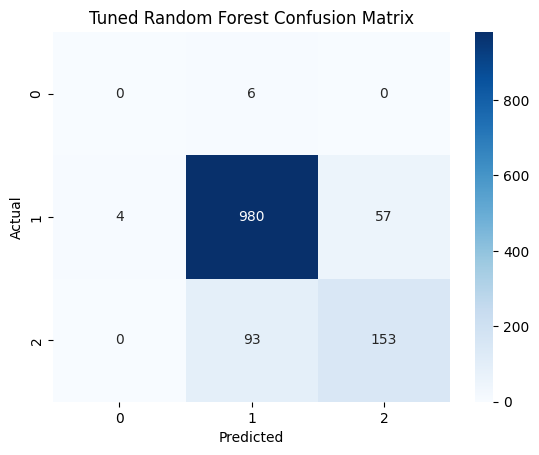

     Actual Predicted
5238      1         1
62        1         1
4205      1         1
5861      1         1
6295      1         1
...     ...       ...
397       1         1
4874      1         1
6076      2         2
5253      1         1
4924      1         1

[1293 rows x 2 columns]


In [8]:
# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(random_state=42), 
                               param_grid_gb, cv=3, scoring='accuracy')
grid_search_gb.fit(X_train_scaled, y_train)

print("Best Gradient Boosting Parameters:", grid_search_gb.best_params_)

# Evaluate the best Gradient Boosting model
best_gb_model = grid_search_gb.best_estimator_
best_gb_predictions = best_gb_model.predict(X_test_scaled)
print("Tuned Gradient Boosting Classifier Report:")
print(classification_report(y_test, best_gb_predictions))
print("Tuned Gradient Boosting Accuracy:", accuracy_score(y_test, best_gb_predictions))
print("Tuned Gradient Boosting Precision:", precision_score(y_test, best_gb_predictions, average='weighted'))
print("Tuned Gradient Boosting Recall:", recall_score(y_test, best_gb_predictions, average='weighted'))
print("Tuned Gradient Boosting F1 Score:", f1_score(y_test, best_gb_predictions, average='weighted'))

# Confusion matrix for the tuned Random Forest model
conf_matrix_best_rf = confusion_matrix(y_test, best_gb_predictions)
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Tuned Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a DataFrame to compare actual and predicted values for the tuned Random Forest model
comparison_best_rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': best_gb_predictions})

# Print the comparison DataFrame for the tuned Random Forest model
print(comparison_best_rf_df)

# Random Forest Classifier

Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.90      0.96      0.93      1041
           2       0.77      0.55      0.64       246

    accuracy                           0.88      1293
   macro avg       0.56      0.50      0.52      1293
weighted avg       0.87      0.88      0.87      1293

Random Forest Accuracy: 0.8785769528228925
Random Forest Precision: 0.8676176087442478
Random Forest Recall: 0.8785769528228925
Random Forest F1 Score: 0.8685745527288746


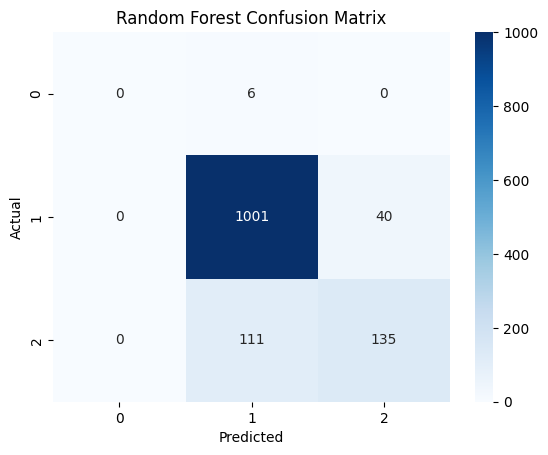

     Actual Predicted
5238      1         1
62        1         1
4205      1         1
5861      1         1
6295      1         1
...     ...       ...
397       1         1
4874      1         1
6076      2         2
5253      1         1
4924      1         1

[1293 rows x 2 columns]


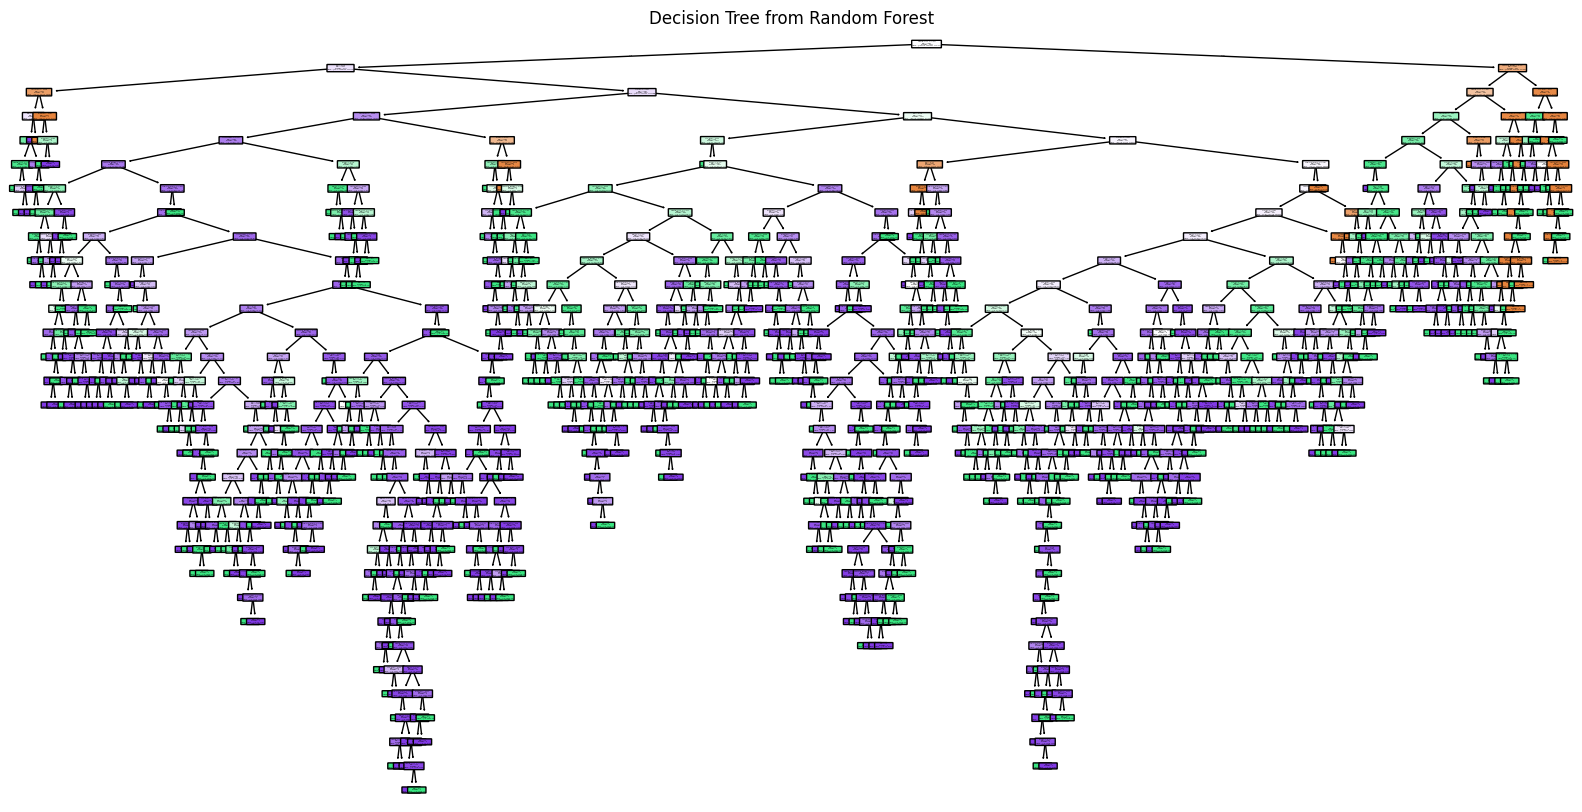

In [ ]:
from sklearn.tree import plot_tree

# Train Random Forest Classifier with class weights
rf_model_weighted = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_weighted.fit(X_train_scaled, y_train)

# Make predictions and evaluate the Random Forest model
rf_predictions = rf_model_weighted.predict(X_test_scaled)
print("Random Forest Classifier Report:")
print(classification_report(y_test, rf_predictions, zero_division=0))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Precision:", precision_score(y_test, rf_predictions, average='weighted', zero_division=0))
print("Random Forest Recall:", recall_score(y_test, rf_predictions, average='weighted'))
print("Random Forest F1 Score:", f1_score(y_test, rf_predictions, average='weighted'))

# Confusion matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, rf_predictions)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': rf_predictions})

# Print the comparison DataFrame
print(comparison_df)

# Plot the first tree in the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_model_weighted.estimators_[0], feature_names=X.columns, filled=True, rounded=True, class_names=['Low', 'Medium', 'High'])
plt.title("Decision Tree from Random Forest")
plt.show()

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Tuned Random Forest Classifier Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.90      0.97      0.93      1041
           2       0.79      0.57      0.66       246

    accuracy                           0.88      1293
   macro avg       0.56      0.51      0.53      1293
weighted avg       0.87      0.88      0.88      1293

Tuned Random Forest Accuracy: 0.8847641144624904
Tuned Random Forest Precision: 0.8748468161633864
Tuned Random Forest Recall: 0.8847641144624904
Tuned Random Forest F1 Score: 0.8751731031424724


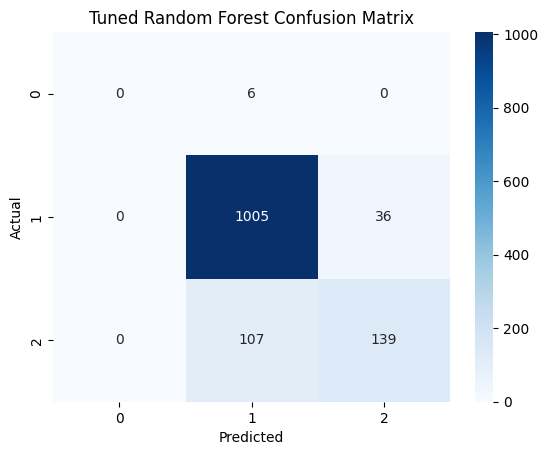

     Actual Predicted
5238      1         1
62        1         1
4205      1         1
5861      1         1
6295      1         1
...     ...       ...
397       1         1
4874      1         1
6076      2         2
5253      1         1
4924      1         1

[1293 rows x 2 columns]


In [11]:
# Hyperparameter tuning for Random Forest
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), 
                               param_grid_rf, cv=3, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

print("Best Random Forest Parameters:", grid_search_rf.best_params_)

# Evaluate the best Random Forest model
best_rf_model = grid_search_rf.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test_scaled)
print("Tuned Random Forest Classifier Report:")
print(classification_report(y_test, best_rf_predictions, zero_division=0))
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, best_rf_predictions))
print("Tuned Random Forest Precision:", precision_score(y_test, best_rf_predictions, average='weighted', zero_division=0))
print("Tuned Random Forest Recall:", recall_score(y_test, best_rf_predictions, average='weighted'))
print("Tuned Random Forest F1 Score:", f1_score(y_test, best_rf_predictions, average='weighted'))

# Confusion matrix for the tuned Random Forest model
conf_matrix_best_rf = confusion_matrix(y_test, best_rf_predictions)
sns.heatmap(conf_matrix_best_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Tuned Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a DataFrame to compare actual and predicted values for the tuned Random Forest model
comparison_best_rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': best_rf_predictions})

# Print the comparison DataFrame for the tuned Random Forest model
print(comparison_best_rf_df)

# Hybrid Model train

PCA + Logistic Regression Accuracy: 0.8205723124516628
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.84      0.96      0.90      1041
           2       0.59      0.25      0.35       246

    accuracy                           0.82      1293
   macro avg       0.48      0.40      0.42      1293
weighted avg       0.79      0.82      0.79      1293



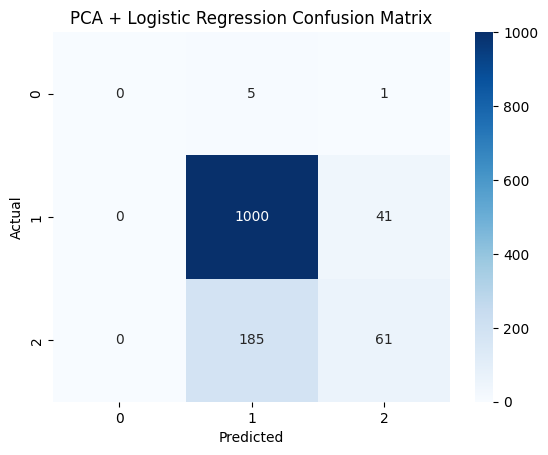

     Actual Predicted
5238      1         1
62        1         1
4205      1         2
5861      1         1
6295      1         1
...     ...       ...
397       1         1
4874      1         1
6076      2         1
5253      1         1
4924      1         1

[1293 rows x 2 columns]


In [12]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

# Create a pipeline with PCA and Logistic Regression
pca_log_reg_pipeline = make_pipeline(
    PCA(n_components=0.9, random_state=42),  
    LogisticRegression(random_state=42)
)

# Train the pipeline
pca_log_reg_pipeline.fit(X_train_scaled, y_train)

# Make predictions
y_pred_pca_log_reg = pca_log_reg_pipeline.predict(X_test_scaled)

# Evaluate the model
print("PCA + Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_pca_log_reg))
print(classification_report(y_test, y_pred_pca_log_reg, zero_division=0))

# Confusion matrix for PCA + Logistic Regression
conf_matrix_pca_log_reg = confusion_matrix(y_test, y_pred_pca_log_reg)
sns.heatmap(conf_matrix_pca_log_reg, annot=True, fmt='d', cmap='Blues')
plt.title('PCA + Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a DataFrame to compare actual and predicted values for PCA + Logistic Regression
comparison_pca_log_reg_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_pca_log_reg})

# Print the comparison DataFrame for PCA + Logistic Regression
print(comparison_pca_log_reg_df)

Stacking Model Report:(Logistic Regression and Random Forest )
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.91      0.95      0.93      1041
           2       0.77      0.60      0.67       246

    accuracy                           0.88      1293
   macro avg       0.56      0.52      0.53      1293
weighted avg       0.88      0.88      0.88      1293

Accuracy: 0.8816705336426914
Precision: 0.8752040738936714
Recall: 0.8816705336426914
F1 score:  0.8758637197430853


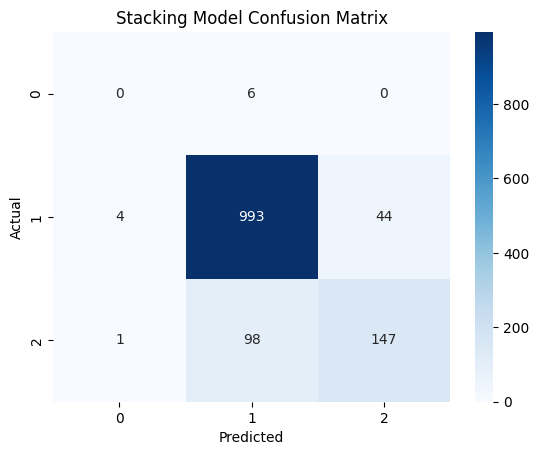

     Actual Predicted
5238      1         1
62        1         1
4205      1         1
5861      1         1
6295      1         1
...     ...       ...
397       1         1
4874      1         1
6076      2         2
5253      1         1
4924      1         1

[1293 rows x 2 columns]


In [23]:
# RF and LR
# Initialize individual models
rf = best_gb_model
# rf = RandomForestClassifier(n_estimators=150,max_depth=None,min_samples_split=2)
lg = pca_log_reg_pipeline
# meta_model = LogisticRegression()
meta_model = VotingClassifier(estimators=[('rf', rf), ('lg', lg)], voting='soft')

# Create a Stacking Classifier as the hybrid model
stacking_model = StackingClassifier(estimators=[('lg', lg), ('rf', rf)], final_estimator=meta_model)

# Fit the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_stacking1 = stacking_model.predict(X_test_scaled)

# Evaluate
print("Stacking Model Report:(Logistic Regression and Random Forest )")
print(classification_report(y_test, y_pred_stacking1, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_stacking1))
print("Precision:", precision_score(y_test, y_pred_stacking1, average='weighted',zero_division=0))
print("Recall:", recall_score(y_test, y_pred_stacking1, average='weighted'))
print("F1 score: ",f1_score(y_test,y_pred_stacking1,average="weighted"))

# Confusion matrix for the stacking model
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking1)
sns.heatmap(conf_matrix_stacking, annot=True, fmt='d', cmap='Blues')
plt.title('Stacking Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a DataFrame to compare actual and predicted values for the stacking model
comparison_stacking_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_stacking1})

# Print the comparison DataFrame for the stacking model
print(comparison_stacking_df)

Stacking Model Report:(Logistic Regression and Gradient Boosting)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.89      0.96      0.92      1041
           2       0.75      0.54      0.63       246

    accuracy                           0.87      1293
   macro avg       0.55      0.50      0.52      1293
weighted avg       0.86      0.87      0.86      1293

Accuracy: 0.8723897911832946
Precision: 0.8612583247476372
Recall: 0.8723897911832946
F1 score:  0.8628189112547032


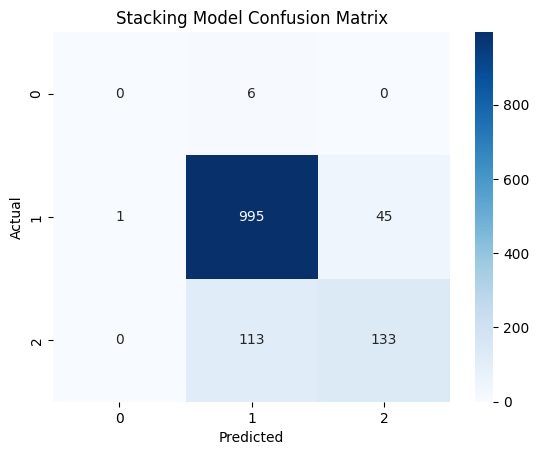

     Actual Predicted
5238      1         1
62        1         1
4205      1         1
5861      1         1
6295      1         1
...     ...       ...
397       1         1
4874      1         1
6076      2         2
5253      1         1
4924      1         1

[1293 rows x 2 columns]


In [15]:
# gb and lr
# Initialize individual models
# gb = best_gb_model
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=6, random_state=42)
lg = pca_log_reg_pipeline
# meta_model = LogisticRegression()
meta_model = VotingClassifier(estimators=[('gb', gb), ('lg', lg)], voting='soft')

# Create a Stacking Classifier as the hybrid model
stacking_model = StackingClassifier(estimators=[('lg', lg), ('gb', gb)], final_estimator=meta_model)

# Fit the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_model.predict(X_test)

# Evaluate
print("Stacking Model Report:(Logistic Regression and Gradient Boosting)")
print(classification_report(y_test, y_pred_stacking, zero_division=0))
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print("Precision:", precision_score(y_test, y_pred_stacking, average='weighted',zero_division=0))
print("Recall:", recall_score(y_test, y_pred_stacking, average='weighted'))
print("F1 score: ",f1_score(y_test,y_pred_stacking,average="weighted"))

# Confusion matrix for the stacking model
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
sns.heatmap(conf_matrix_stacking, annot=True, fmt='d', cmap='Blues')
plt.title('Stacking Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Create a DataFrame to compare actual and predicted values for the stacking model
comparison_stacking_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_stacking})

# Print the comparison DataFrame for the stacking model
print(comparison_stacking_df)

In [24]:
# Print the accuracy for all models
print ("Accuracy for all compared models")
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))
print("Tuned Gradient Boosting Accuracy:", accuracy_score(y_test, best_gb_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, best_rf_predictions))
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_pca_log_reg))
print("Stacking Model (Logistic Regression and Random Forest) Accuracy:", accuracy_score(y_test, y_pred_stacking1))
print("Stacking Model (Logistic Regression and Gradient Boosting) Accuracy:", accuracy_score(y_test, y_pred_stacking))

Accuracy for all compared models
Gradient Boosting Accuracy: 0.8352668213457076
Tuned Gradient Boosting Accuracy: 0.8762567672080434
Random Forest Accuracy: 0.8785769528228925
Tuned Random Forest Accuracy: 0.8847641144624904
Logistic Regression Accuracy: 0.8205723124516628
Stacking Model (Logistic Regression and Random Forest) Accuracy: 0.8816705336426914
Stacking Model (Logistic Regression and Gradient Boosting) Accuracy: 0.8723897911832946
